<a href="https://colab.research.google.com/github/hiitsAndre/ECE470/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the first programming assignment for CS 498 RL!**

This assignment will get you familiar with the OpenAI gym environment and estimation via sampling trajectories.

In [1]:
import gym

We will be playing on the Cartpole environment. As the title suggests, the task in this environment is to balance a pole on top of a cart. The official description of the environment from the OpenAI Gym website (https://gym.openai.com/) is:

> A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials. This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson [Barto83].

The environment is loaded as follows:

In [2]:
env = gym.make('CartPole-v0')
env.reset() #must reset the environment before interacting with it
print (env.action_space)   # show the action space, which has 2 actions
print (env.observation_space) #show the state (observation) space, which is a 4-dimensional vector with components of [position,velocity,pole angle, pole velocity at tip]

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


More information can be found on the following wiki page: https://github.com/openai/gym/wiki/CartPole-v0

Here is the policy that you will be using (which just acts randomly with a uniform distribution). 

In [3]:
def policy_unif(s):
  a = env.action_space.sample()
  return a

 You can interact with the environment with the env.step() function, as follows:

In [35]:
observation, reward, done, info = env.step(env.action_space.sample())
print(observation)  # the state that you transition to after taking the action
print(reward)       # immediate reward 
print(done)         # a boolean flag of whether the episode has terminated
print(info)         # not useful for this assignment

[-0.30015929 -0.43595157  0.23493729  0.60091032]
0.0
True
{}


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


**Q1**: Write a method called collect_trajectory(policy) which collects one trajectory for an episode in the Cartpole environment. Your method should take as input the policy and output a list of the form (s0,a0,r0,s1,a1,r1,...,sT,aT,rT), where T is the length of the episode.

In [36]:
# generate a trajectory in the environment  
# use env.step to roll out a trajectory until the episode terminates
# output a list of the form [s0, a0, r0, s1, a1, ..., sT, aT, rT] (s_{T+1} is the terminal state)
def collect_trajectory(policy):
  s0 = env.reset() #reset the environment
  # YOUR CODE HERE
  action = policy_unif(s0)
  observation, reward, done, info = env.step(action)
  # initialize output list
  output = [s0, action, reward]
  while done != True:
    output.append(observation)
    action = policy_unif(observation)
    output.append(action)
    observation, reward, done, info = env.step(action)
    output.append(reward)
  return output

**Q2**: Write a method called compute_return, which takes as input one trajectory of the form given by collect_trajectory in Q1 and a discount factor, and calculates the random return of the trajectory, i.e., r1 + γ r2 + γ^2 r3 + ... + γ^{T-1} rT.

In [37]:
def compute_return(traj, gamma):
  # YOUR CODE HERE
  retval = 0
  i = 2
  while i < len(traj):
    retval = retval + pow(gamma, int(i/3)) * traj[i]
    i = i + 3
    
  return retval

**Q3**: Collect 150 trajectories starting from the initial states given by env.reset() and compute the random return of each trajectory, using the given policy and $\gamma=0.99$.

1.   Plot a histogram of these returns.
2.   Estimate the mean of these returns, and give your result in the form of $X \pm Y$, where $X$ is the estimated mean and $Y$ is twice the standard error of your mean estimate, which corresponds to a 99% confidence interval.

Remark: The mean is also an estimate of the value function of $\pi$ for the initial state, often referred to as a "Monte-Carlo" estimation.

mean of returns:  19.759408421188514 ± 1.5243021041026936


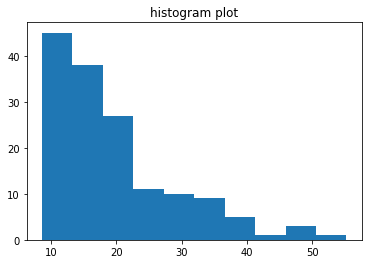

In [49]:
# useful libraries
import matplotlib.pyplot as plt
import numpy as np

# use plt.hist to create histogram plot
# YOUR CODE HERE
ret = []
for i in range(150):
  traj = collect_trajectory(policy_unif(env.reset()))
  rr = compute_return(traj, 0.99)
  ret.append(rr)
plt.hist(ret)
plt.title('histogram plot')

print('mean of returns: ', np.mean(ret), u"\u00B1", 2*np.std(ret)/np.sqrt(150-1))

**Q4 (Optional)**: A linear policy has parameters $\beta_1 \in \mathbb{R}^4$ and $\beta_0 \in \mathbb{R}$. It computes $\beta_1^\top x - \beta_0$, chooses action $+1$ if $\beta_1^\top x - \beta_0 \geq 0$, and chooses action $-1$ otherwise.

Write a random search learner. Randomly generate 10 linear policies, evaluate them by sampling trajectories, and output the policy with the highest return.

